In [2]:
import sqlite3
import pandas as pd
db_name='yelp_database.db'
conn = sqlite3.connect(db_name)

In [3]:
print("\nRestraunts Table:")
restaurant_df = pd.read_sql("""
          SELECT * FROM Restaurants
            """, con = conn)
restaurant_df


Restraunts Table:


,restaurant_id,name,stars,num_reviews,price_range,category_list
0,0,Zia Gianna,4.5,70,$$,"Coffee & Tea, Italian, Bakeries"
1,1,Oasis Vegan Veggie Parlor,4.5,97,$,"Vegan, Vegetarian"
2,2,50Kitchen,4.5,58,NA,Asian Fusion
3,3,Home.Stead Bakery & Cafe,4.5,118,$,"Coffee & Tea, Sandwiches, Bakeries"
4,4,Honeycomb Cafe,4.5,68,$,"Coffee & Tea, Breakfast & Brunch, Sandwiches"
...,...,...,...,...,...,...
183,183,Hop Sing’s,No rating,0,NA,Restaurants
184,184,Nice N’ Clean Jamaican Cuisine,No rating,0,NA,Caribbean
185,185,Foley Fish Company,No rating,0,NA,Seafood
186,186,Cibao Restaurant,No rating,0,NA,Pizza


In [4]:
# creating a dictionary to count the number of restaurants in every category
category_dict = {}
for i in range(0,len(restaurant_df['category_list'])):
    restaurant_df['category_list'][i] = restaurant_df['category_list'][i].replace(' ','').split(',')
    for category in restaurant_df['category_list'][i]:
        if category not in category_dict:
            category_dict[category] = 1
        else:
            category_dict[category] += 1
    
sorted_category_dict = sorted(category_dict.items(), key=lambda x:x[1], reverse=True) 
print(sorted_category_dict)

[('Pizza', 29), ('Sandwiches', 22), ('American(Traditional)', 19), ('Chinese', 17), ('Vietnamese', 15), ('Burgers', 14), ('Restaurants', 12), ('Coffee&Tea', 11), ('American(New)', 11), ('Breakfast&Brunch', 10), ('Mexican', 9), ('ChickenWings', 9), ('FastFood', 9), ('Salad', 8), ('Caribbean', 8), ('Bars', 7), ('Italian', 6), ('Bakeries', 6), ('Delis', 6), ('Seafood', 6), ('LatinAmerican', 6), ('CocktailBars', 5), ('AsianFusion', 4), ('Barbeque', 4), ('Spanish', 4), ('SoulFood', 3), ('African', 3), ('Dominican', 3), ('ChickenShop', 3), ('Ramen', 2), ('Indian', 2), ('InternationalGrocery', 2), ('Trinidadian', 2), ('Southern', 2), ('Portuguese', 2), ('SportsBars', 2), ('Cafes', 2), ('Pubs', 2), ('Irish', 2), ('Venues&EventSpaces', 2), ('Wineries', 2), ('Lounges', 2), ('SeafoodMarkets', 2), ('Thai', 2), ('Noodles', 2), ('Grocery', 2), ('Diners', 2), ('Soup', 2), ('Wraps', 2), ('ComfortFood', 2), ('Tacos', 2), ('Vegan', 1), ('Vegetarian', 1), ('Fruits&Veggies', 1), ('Bangladeshi', 1), ('Juic

/Users/nehavidyadharan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


/Users/nehavidyadharan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


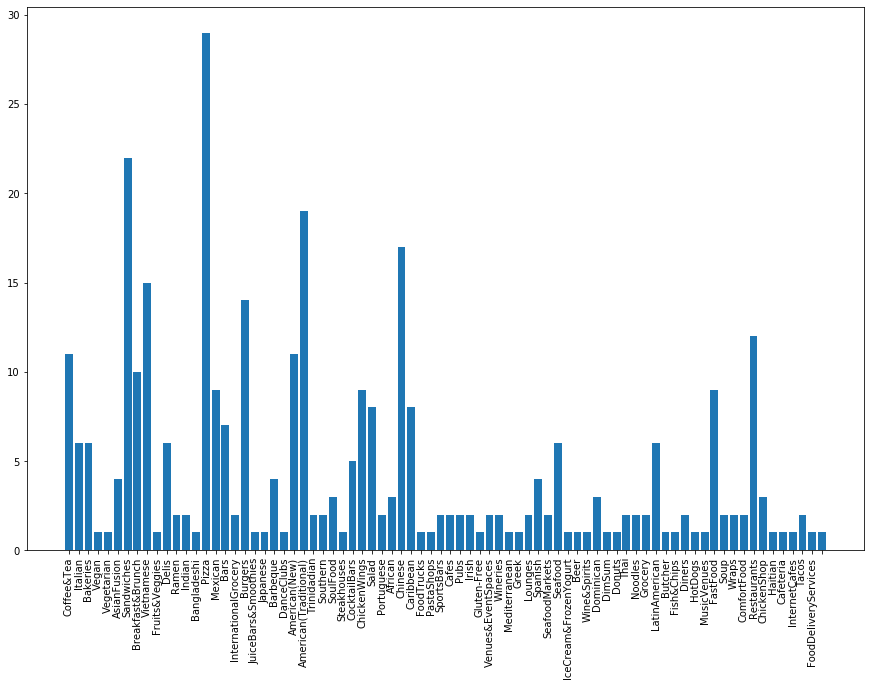

<Figure size 864x576 with 0 Axes>

In [5]:
# bar char that shows the count of the number of restaurants in every category
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10)).gca()
names = list(category_dict.keys())
values = list(category_dict.values())

#tick_label does the some work as plt.xticks()
plt.bar(range(len(category_dict)),values,tick_label=names)
plt.xticks(rotation=90)
plt.savefig('bar.png')
plt = plt.figure(figsize=(12,8))
plt.show()

In [6]:
# table that shows the count of the number of restaurants in every category
category_df = pd.DataFrame(sorted_category_dict, columns=['category','count'])
print(category_df.shape)
category_df[:50]

(78, 2)


,category,count
0,Pizza,29
1,Sandwiches,22
2,American(Traditional),19
3,Chinese,17
4,Vietnamese,15
5,Burgers,14
6,Restaurants,12
7,Coffee&Tea,11
8,American(New),11
9,Breakfast&Brunch,10


stars
1             3
1.5           2
2            17
2.5          11
3            25
3.5          44
4            41
4.5          13
5             7
No rating    25
Name: restaurant_id, dtype: int64


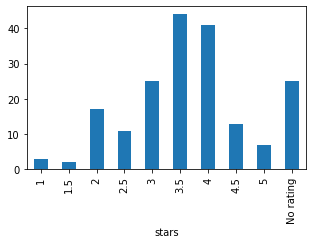

In [7]:
# bar char that shows the count of the number of restaurants in grouped by every rating
count_by_stars = restaurant_df.groupby('stars')['restaurant_id'].count()
print(count_by_stars)
count_by_stars.plot.bar(figsize=(5,3))

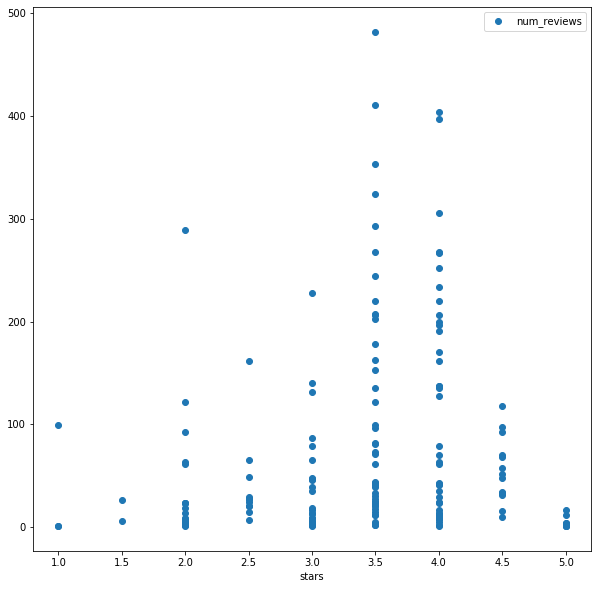

In [8]:
# scatter that shows the count of the number of reviews grouped by every rating

restaurant_ratings_reviews = restaurant_df[['stars', 'num_reviews']]

filtered_df = restaurant_ratings_reviews[restaurant_df['stars'] != 'No rating']

converated_filtered_df = filtered_df.apply(pd.to_numeric, args=('coerce',))
converated_filtered_df.plot(x='stars', y='num_reviews', style='o',figsize=(10,10))


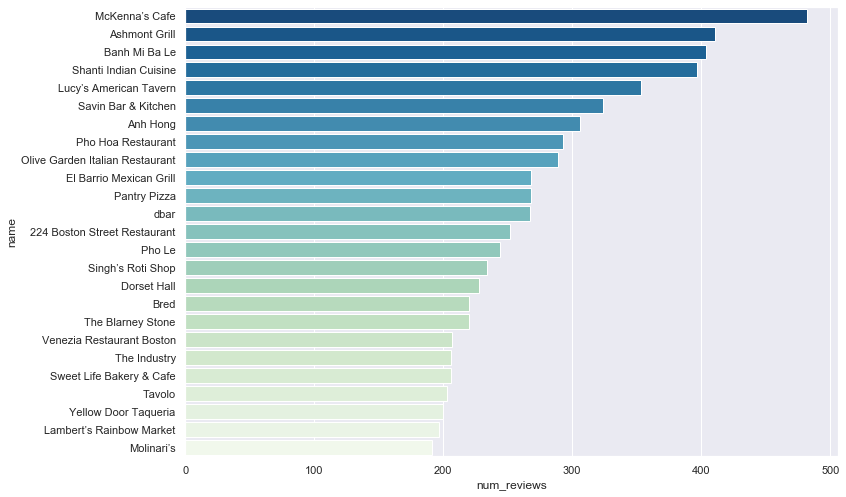

In [9]:
# Plot to shpw top 25 restaurants with the highest number of review counts
import seaborn as sns

restaurant_df = pd.read_sql("""
          SELECT name, num_reviews FROM Restaurants order by cast(num_reviews as unsigned) desc
            """, con = conn)
restaurant_df = restaurant_df.head(25)


sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=restaurant_df['num_reviews'], y = restaurant_df['name'], palette=sns.color_palette("GnBu_r", len(restaurant_df)), ci=None)
# plt.xlabel('Reviews count', labelpad=10, fontsize=14)
# plt.ylabel('Restaurant name', fontsize=14)
# plt.title('TOP 25 Restaurants with most reviews', fontsize=15)
# plt.tick_params(labelsize=14)
# plt.xticks(rotation=15)


In [10]:
users_df = pd.read_sql("""
          SELECT * FROM Users
            """, con = conn)
users_df

,user_id,user_name,user_location,count_friends,count_reviews,count_photos
0,0,Shawn G.,"Boston, MA",0,13,9
1,1,Shaquille A.,"Boston, MA",277,116,157
2,2,Arnold H.,"Providence, RI",12,365,15
3,3,Venessa R.,"Dorchester, Boston, MA",77,158,28
4,4,Eli F.,"Cambridge, MA",4,71,87
...,...,...,...,...,...,...
8538,8538,Vinny S.,"North Attleborough, MA",0,1,0
8539,8539,Karstals Y.,"Quincy, MA",0,1,0
8540,8540,Paige T.,"Boston, MA",0,7,117
8541,8541,Carolyn A.,"San Francisco, CA",0,1,1


In [11]:
# User Data to learn about the location of the users, visiting Dorchester
users_df = users_df[users_df['user_location']!='not_available']
count_by_location = users_df.groupby('user_location')['user_id'].count().reset_index()
result = count_by_location.sort_values('user_id', ascending=False)
result = result.head(50)
result

,user_location,user_id
114,"Boston, MA",2726
892,"Quincy, MA",369
287,"Dorchester, Boston, MA",238
289,"Dorchester, MA",201
690,"Milton, MA",169
164,"Cambridge, MA",139
286,"Dorchester Center, MA",108
964,"San Francisco, CA",93
1012,"Somerville, MA",91
740,"New York, NY",87
